# Logistic Regression

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### TF-IDF Vectorised Data

In [6]:
# Import TF-IDF data
X_train = pd.read_csv('data/tfidf_X_train.csv')

X_test= pd.read_csv('data/tfidf_X_test.csv')

y_train = pd.read_csv('data/tfidf_y_train.csv')

y_test = pd.read_csv('data/tfidf_y_test.csv')

In [7]:
# Inspect the loaded datasets to see if there are any issues
display(X_train)
display(y_train)
display(X_test)
display(y_test)

,Unnamed: 0,h_10,h_2016,h_2017,h_america,h_attack,h_big,h_campaign,h_clinton,h_deal,...,b_york city,b_york times,b_york times newsletter,b_york times product,b_young,b_young people,b_youth,b_youtube,b_zero,b_zone
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,0.0,0.0,0.723634,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.020271,0.000000,0.031749,0.000000,0.000000,0.0
3,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.338232,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,8253,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8254,8254,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.025808,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8255,8255,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.036137,0.028606,0.000000,0.000000,0.000000,0.0
8256,8256,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


,Unnamed: 0,Label
0,2932,0
1,1768,0
2,5489,1
3,4991,1
4,5287,0
...,...,...
8253,2895,1
8254,7813,0
8255,905,1
8256,5192,0


,Unnamed: 0,h_10,h_2016,h_2017,h_america,h_attack,h_big,h_campaign,h_clinton,h_deal,...,b_york city,b_york times,b_york times newsletter,b_york times product,b_young,b_young people,b_youth,b_youtube,b_zero,b_zone
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2061,2061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2062,2062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2063,2063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561864,0.0,...,0.0,0.0,0.0,0.0,0.174811,0.0,0.0,0.0,0.0,0.0


,Unnamed: 0,Label
0,9145,0
1,9773,1
2,4740,1
3,7867,1
4,396,0
...,...,...
2060,3821,0
2061,4668,0
2062,6153,1
2063,7233,1


We have some added columns for each of the datasets. I will need to remove these before running models.

In [8]:
# Fix X_train
X_train.drop('Unnamed: 0', axis=1, inplace=True)

# Fix y_train
y_train.drop('Unnamed: 0', axis=1, inplace=True)

# Fix X_test
X_test.drop('Unnamed: 0', axis=1, inplace=True)

# Fix y_train
y_test.drop('Unnamed: 0', axis=1, inplace=True)

First I will fit an unoptimised, out-of-the-box Logistic Regression Classifier to see what our base accuracy is.

In [9]:
# fitting an out of the box logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

# Training score
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test,y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9509566480988133
Test Accuracy: 0.9351089588377723


This training and test accuracy are fantastic, but also a little supsicious. I am aware that using NLP for Sentiment Analysis is not a simple task and was expecting an initial accuracy of around 60-70%. I suspect that there must be something trivial in the dataset that the model is picking up on. Let's take a look!

In [10]:
# Get the model's coefficients
coeffs = logreg.coef_[0]

As the labelling for the dataset is 0 for Fake News and 1 for Real News, this means that the large, positive coeffcients represent features that suggest a the article is Real. While large, negative coefficients are indicative of a feature that suggests the article is Fake. 

I will sort the coefficients and look at the top 10 and bottom 10 coefficients to see which features are most suggestive of the different types of news.

In [11]:
# Sort the indices of the coefficients in ascending order by coefficient value (negative coefficients at the top)
sorted_coeff_indices = np.argsort(coeffs)
sorted_coeff_indices.shape

(3769,)

In [12]:
# Get the top 10 negative coefficients (Fake News features)
fake_indices = sorted_coeff_indices[:10]
fake_indices

array([  87,  743, 1613,  366, 2262, 3180, 1655, 2273, 2274, 3086])

In [13]:
# Get the top 10 positive coefficients (Real News features)
real_indices = sorted_coeff_indices[-10:]
real_indices

array([2968,  455, 2576, 2157, 3555,  823,  596,  724, 2882, 2975])

In [14]:
# Extract the labels corresponding to the Fake News features
X_train.columns[fake_indices]

Index(['b_2016', 'b_com', 'b_hillary', 'b_article', 'b_not', 'b_source',
       'b_http', 'b_november', 'b_november 2016', 'b_share'],
      dtype='object')

In [15]:
# Extract the labels corresponding to the Real News features
X_train.columns[real_indices]

Index(['b_sanders', 'b_bbc', 'b_president', 'b_monday', 'b_unfold',
       'b_conservative', 'b_caption', 'b_cnn', 'b_reuters', 'b_say'],
      dtype='object')

From looking at the features that are most associated with Real and Fake News articles, there is one "rule" that the model appears to have picked up on. Notice that 3 of the features used to determine Real News are BBC, Reuters and CNN. These are reputable news sites and as such are likley to be sources of Real News and an article from that source will likely contain reference to themselves within the article's content. 

What this means is that the model has picked up on the fact that if the article comes from a reputable source it is likely to be Real News as opposed to Fake News. This is intuitively a good rule to follow, but is not what I am looking to achieve with my model.

After some thinking I came up with a solution. Given that people on Facebook are often scrolling through a cluttered news feed they often won't read the article itself, but will only read the headline. In addition, the IPSOS study tested people's abilities to identify Fake News based solely on the article's headlines.

As a result, I decided to drop the body from dataset and only use the article's headline to determine if the article is Fake News as it is more useful and will be less likely to use trivial features to make the classification.

In [16]:
# Dropping features from the article's body

X_train_head = X_train
X_test_head = X_test
for col in X_train.columns:
    if "b_" in col:
        X_train_head.drop([col], axis=1, inplace=True)
        X_test_head.drop([col], axis=1, inplace=True)

Now I will re-run the out-of-the-box Logistic Regression model and see how this has affected the training and test accuracy. I will also rename the label datasets to match the training datasets.

In [17]:
# Relabelling the target datasets
y_train_head = y_train
y_test_head = y_test

logreg = LogisticRegression(random_state=1)
logreg.fit(X_train_head, y_train_head)

# Training score
train_accuracy = logreg.score(X_train_head, y_train_head)
test_accuracy = logreg.score(X_test_head,y_test_head)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.6277549043351901
Test Accuracy: 0.6237288135593221


Fantastic! These accuracies are more in line with what I was expecting. My goal from here would be to achieve an accuracy of over 75% using optimised models. I expect the Recurrent Neural Network will be the best model but we shall see.

First I will save the new dataset with only the headline data, and then work on optimising my Logistic Regression model and see what parameters I can tune to improve the training and test accuracy.

In [18]:
# Save and export the train and test Headline dataset
X_train_head.to_csv('data/X_train_head.csv', header=True, index=False)
X_test_head.to_csv('data/X_test_head.csv', header=True, index=False)

y_train_head.to_csv('data/y_train_head.csv', header=True, index=False)
y_test_head.to_csv('data/y_test_head.csv', header=True, index=False)

### Optimising my model through Hyperparameter tuning

There are a number of hyperparameters that can be optimised for Logistic Regression. The parameters that I will choose to optimise are: \

The penalty, either Lasso regression (L1), Ridge regression (l2). Ridge regression adds the square of the coefficients to the cost function will Lasso regression adds the magnitude of the coefficient. Lasso is often used as a form of feature selection as it will shrink less important coefficients to 0. I expect L1 to be the optimal penalty in this scenario.

C, this controls the strength of the regularisation parameter as it is the inverse of the lambda regulator. The smaller C is, the stronger the regularisation will be.

The Solver has a number of options for how to solve the optimisation problem of the cost function: newton-cg, lbfgs, liblinear, sag, saga.

I was planning on using GridSearchCV to conduct this optimisation, however, a number of these parameter choices don't work together. So instead I will run a for loop and keep track of the best combination of parameters.

In [15]:
from sklearn.model_selection import GridSearchCV

penalties = ['l1', 'l2', 'none']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_params = []
best_test_score = 0

for penalty in penalties:
    for c in cs:
        for solver in solvers:
            if (penalty == 'l1') and ((solver == 'newton-cg') or (solver == 'lbfgs') or (solver == 'sag')):
                continue 
            elif (penalty == 'l2' or penalty == 'none') and (solver == 'liblinear'):
                continue
            else:
                model = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=1)
                model_fit = model.fit(X_train_head, y_train_head)
                
                test_score = model.score(X_test_head, y_test_head)
                if test_score > best_test_score:
                    best_params = [penalty, c, solver]
                    best_test_score = test_score                      

Current params: l1, 0.0001, liblinear
Test score: 0.513317191283293
Best params: ['l1', 0.0001, 'liblinear']
Best_test_score: 0.513317191283293
Current params: l1, 0.0001, saga
Test score: 0.513317191283293
Best params: ['l1', 0.0001, 'liblinear']
Best_test_score: 0.513317191283293
Current params: l1, 0.001, liblinear
Test score: 0.513317191283293
Best params: ['l1', 0.0001, 'liblinear']
Best_test_score: 0.513317191283293
Current params: l1, 0.001, saga
Test score: 0.513317191283293
Best params: ['l1', 0.0001, 'liblinear']
Best_test_score: 0.513317191283293
Current params: l1, 0.01, liblinear
Test score: 0.513317191283293
Best params: ['l1', 0.0001, 'liblinear']
Best_test_score: 0.513317191283293
Current params: l1, 0.01, saga
Test score: 0.513317191283293
Best params: ['l1', 0.0001, 'liblinear']
Best_test_score: 0.513317191283293
Current params: l1, 0.1, liblinear
Test score: 0.6188861985472155
Best params: ['l1', 0.1, 'liblinear']
Best_test_score: 0.6188861985472155
Current params: l

Current params: none, 0.1, sag
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 0.1, saga
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 1, newton-cg
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 1, lbfgs
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 1, sag
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 1, saga
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 10, newton-cg
Test score: 0.6232445520581114
Best params: ['l1', 1, 'liblinear']
Best_test_score: 0.625181598062954
Current params: none, 10, lbfgs
Test score: 0.6232445520581114

In [16]:
# What are the best parameters?
print(f'Best parameters: {best_params}')

Best parameters: ['l1', 1, 'liblinear']


In [17]:
# Re-run the model with the optimised parameters and see how much the training and test accuracies improve

log_model = LogisticRegression(penalty=best_params[0], C=best_params[1], solver=best_params[2], random_state=1)
log_model_fit = log_model.fit(X_train_head, y_train_head)

# Training score
train_accuracy = log_model.score(X_train_head, y_train_head)
test_accuracy = log_model.score(X_test_head,y_test_head)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.6281181884233471
Test Accuracy: 0.625181598062954


After all of that, we only got a .25% increase in our test_accuracy. This is not too surprising. Perhaps reducing the number of dimensions of my data using PCA will help improve my model. One issue with this is that it will become difficult to interpret how the model is making its classification decisions as I won't be able to extract specific words and their coefficients anymore. 

Let's give PCA a try and see if there is any improvement and if it would be worth sacrificing the explicative qualities of the model for better accuracy.

# Prinicpal Component Analysis for Dimension Reduction

In [18]:
X_train_head.shape

(8258, 41)

The current training and test sets have 41 features, which is not a lot compared to my original dataset. Even so, by reducing the number of dimensions we may be able to explain a large portion of the data's variance with a signficantly smaller number of features and improve the accuracy of our models. Here I will aim to find the best number of dimensions that explain 80% of the data's variance. Then I will transform my original dataset using these components and then re-optimise my Logistic Regression model.

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Build and fit a PCA model to the data

# 1. Instantiate with 41 components to have enough to see the elbo plot
my_pca = PCA(n_components=41)

# 2. Fit (mathematical calculations are made at this step) 
my_pca.fit(X_train_head)

# 3. Transform
X_PCA = my_pca.transform(X_train_head)

In [23]:
# Calculate the cumulative variance explained over the components
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative)

[0.10994775 0.17161755 0.2146728  0.25440976 0.29160447 0.32363431
 0.35435065 0.38448352 0.41425486 0.44303842 0.47095768 0.49795379
 0.52284432 0.54688423 0.57048376 0.59366479 0.61636214 0.63898508
 0.66131805 0.68329753 0.70504708 0.7265041  0.74649275 0.76613258
 0.7852417  0.80365461 0.82188933 0.83912074 0.85612351 0.8725863
 0.88808551 0.903048   0.91790746 0.9320736  0.94540515 0.95865196
 0.9696751  0.98042361 0.9902783  0.99927237 1.        ]


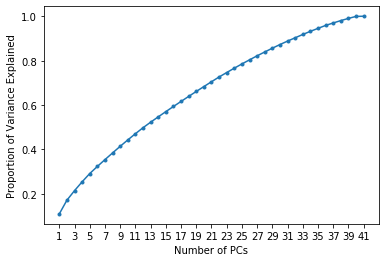

In [24]:
# Find the number of components that explains 80% of the variance 
plt.figure()
plt.plot(range(1,42),expl_var_cumulative,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,42,2))
plt.show()

In [25]:
# Get the explained variance ratio for each component
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[0.10994775 0.0616698  0.04305525 0.03973695 0.03719471 0.03202984
 0.03071634 0.03013288 0.02977134 0.02878356 0.02791925 0.02699612
 0.02489053 0.02403991 0.02359952 0.02318104 0.02269735 0.02262294
 0.02233296 0.02197949 0.02174955 0.02145702 0.01998864 0.01963983
 0.01910912 0.01841291 0.01823472 0.0172314  0.01700277 0.0164628
 0.01549921 0.01496249 0.01485946 0.01416613 0.01333156 0.01324681
 0.01102314 0.01074851 0.00985469 0.00899406 0.00072763]


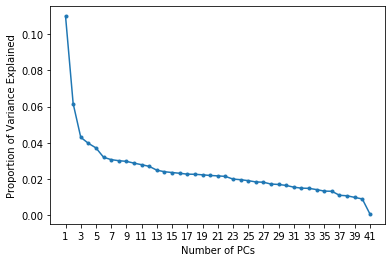

In [26]:
# Find the elbow in the scree plot
plt.figure()
plt.plot(range(1,42),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,42,2))
plt.show()

From the two plots above, we have a decision to make. Based on the scree plot, the elbow appears to occur around 3 components. When we look at the cumulative variance explained, however, 3 components only explains 20% of the variance. I expect this is too low and will siginificantly reduce the acccuracy of my model as I will be discarding a significant amount of information. It looks as though 25 components will explain 80% of the variance, however, to compare and see if there is an optimal number of components I will run a for loop over a range from 1 to 31, as I want to have some form of dimensionality reduction, and see which is the best outcome.

In [58]:
components_range = np.arange(1, 32, 5)
best_component = 0
best_PCA_test_score = 0
best_PCAPparams = []
best_test_score = 0

for component in components_range:

    # Train on the components
    my_pca = PCA(n_components=component)
    my_pca.fit(X_train_head)

    # transform data onto the components
    X_train_PCA = my_pca.transform(X_train_head)

    # Transform test data
    X_test_PCA = my_pca.transform(X_test_head)



    # Re-optimise the Logistic Regression with the transformed dataset
    from sklearn.model_selection import GridSearchCV

    penalties = ['l1', 'l2', 'none']
    cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

    best_params = []
    best_test_score = 0
    
    for penalty in penalties:
        for c in cs:
            for solver in solvers:
                if (penalty == 'l1') and ((solver == 'newton-cg') or (solver == 'lbfgs') or (solver == 'sag')):
                    continue 
                elif (penalty == 'l2' or penalty == 'none') and (solver == 'liblinear'):
                    continue
                else:
                    model = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=1)
                    model_fit = model.fit(X_train_PCA, y_train_head)

                    test_score = model.score(X_test_PCA, y_test_head)
                    if test_score > best_test_score:
                        best_params = [penalty, c, solver]
                        best_test_score = test_score
                    
    if best_test_score > best_PCA_test_score:
        best_PCA_test_score = best_test_score
        best_PCA_params = best_params
        best_component = component

In [59]:
# What are the best parameters?
print(f'Best parameters: {best_PCA_params}')

# What is the best number of components?
print(f'Best parameters: {best_component}')

Best parameters: ['l1', 0.1, 'saga']
Best parameters: 26


In [60]:
# Re-run the model with the optimised parameters with the data transformed using the optimal number of components 
# see how much the training and test accuracies improve

# Train on the components
my_pca = PCA(n_components=best_component)
my_pca.fit(X_train_head)

# transform data onto the components
X_train_PCA = my_pca.transform(X_train_head)

# Transform test data
X_test_PCA = my_pca.transform(X_test_head)

log_model = LogisticRegression(penalty=best_PCA_params[0], C=best_PCA_params[1], 
                               solver=best_PCA_params[2], random_state=1)
log_model_fit = log_model.fit(X_train_PCA, y_train_head)

# Training score
train_accuracy = log_model.score(X_train_PCA, y_train_head)
test_accuracy = log_model.score(X_test_PCA, y_test_head)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.6144344877694357
Test Accuracy: 0.6188861985472155


The accuracy of our model did decrease when reducing the number of dimensions. This is not too surprising as we are removing information about our data when we reduce the number of components. That being said we lost less than 0.7% accuracy but reduced our dataset from 41 to 26 features. This would be seen as a reasonable sacrifice for an improvement in performance,  but hopefully we can improve our detector's accuracy using a different model. 

Up next, Random Forests!